In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

import numpy as np

ModuleNotFoundError: No module named 'pandas'

# Load Dataset

In [4]:
# Confirmation, recovery, and death data sets by region worldwide
# 전세계 지역별 확진자, 회복자, 사망자 Data Set
url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'
data = pd.read_csv(url, error_bad_lines=False)

# Understanding the structure of the data set
# Data Set의 구조 파악
data.head()

NameError: name 'pd' is not defined

# Make it Simple

In [1]:
# Make Korea's confirmed cases timeseries dataframe
# 한국의 확진자 시계열 데이터프레임를 확인합니다

# 한국 데이터 정보만 불러온다
df_korea = data[data['Country/Region'] == 'Korea, South']
df_korea.tail()

# 전치행렬 과정
# 속성값을 'date' 와 'confirmed'만을 사용
df_korea = np.column_stack([df_korea.Date, df_korea.Confirmed])
df_korea =  pd.DataFrame(df_korea)

# 기존인덱스 제거 후 컬럼이름 정해주기
df_korea = df_korea.reset_index().rename(columns={0: 'date', 1: 'confirmed'})
df_korea = df_korea.drop("index", axis=1)

# 필요한 행 추가
# df_korea = df_korea.append([
#   {'date': pd.to_datetime('2020-03-22'), 'confirmed': 8,897}], ignore_index=True)

df_korea.head()

NameError: name 'data' is not defined

# Plot

In [22]:
# Plot Korean COVID19 confirmed cases.
# 한국 코로나19 확진자 트렌드를 그래프로 만듭니다.

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_korea.date,
        y=df_korea.confirmed,
        name='Confirmed in Korea'
    )
)

fig

# Facebook Prophet

In [23]:
# Make dataframe for Facebook Prophet prediction model.
# Facebook Prophet 예측 모델에 넣을 데이터프레임을 만들어줍니다.
df_prophet = df_korea.rename(columns={
    'date': 'ds',
    'confirmed': 'y'
})

df_prophet.tail()

ds     y
62  2020-03-24  9037
63  2020-03-25  9137
64  2020-03-26  9241
65  2020-03-27  9332
66  2020-03-28  9478

# Create a Model

# Add changepoints to Make More Flexible
- https://facebook.github.io/prophet/docs/trend_changepoints.html

In [24]:
# Make Prophet model including daily seasonality
# Prophet에서 감안할 계절성을 선택해서 모델을 만듭니다
m = Prophet(
    # 값이 커질수록 모델이 유연하게 된다.
    changepoint_prior_scale=0.2, 
    # 앞부분의 얼만큼을 보고서 변화점을 만들것인지?(기본값은 0.8)
    changepoint_range=0.9, 
    # 연별,주별 트렌드를 분석하는데 넣을것인지?
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='additive'
)

# 학습시키기
m.fit(df_prophet)

# 70일치 데이터를 예측할것이다.
future = m.make_future_dataframe(periods=70)
# future.tail(7)
forecast = m.predict(future)
# 날짜, 예측값, 예측값중 최소값, 예측값중 최대값
# forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

fig = plot_plotly(m, forecast)
py.iplot(fig)

# Plot changepoints

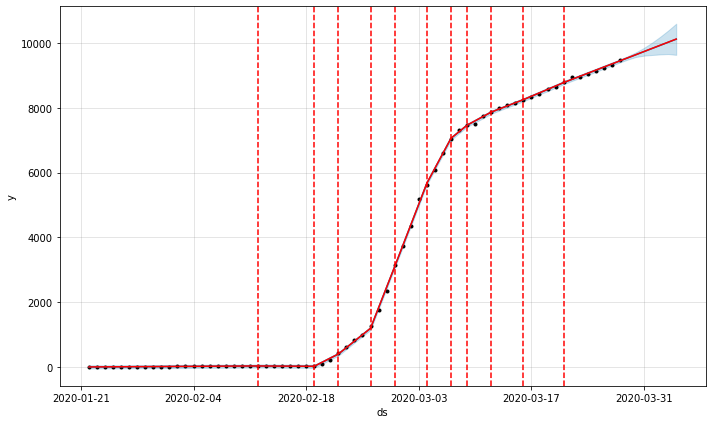

In [25]:
# display changepoints as red dotted line on the plot.
# changepoint를 그래프에 반영해봅시다.
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)